## Analyzing Competetion in eBay Auctions

- **Barnali Das (21060641010)**
- **Durgesh Kinnerkar (21060641016)**
- **Ravi Shankar (21060641037)**

## Introduction

An auction is a sales event wherein potential buyers place competitive bids on assets or services either in an open or closed format. Auctions are popular because buyers and sellers believe they will get a good deal buying or selling assets.

Ebay is one such site which offers auctions where you can bid on different items and commit that you will buy it once you win the auction. There are over eighty million people visiting eBay.com with over two hundred million individual auctions. Ebay faces many challenges. In order to encounter those, it has taken several steps such as Automatic bidding, Restricting a bid, Reserve prices, Responding to Second chance offers, tipping for winning auction and many more.

Through this study we wanted to understand how these online auctions work in Ebay by considering different variables and understand if the buyers and sellers consider different factors while bidding and the criterias for defining a particular bid as competitive or non competitive.

In order to achieve that, the following were the objectives:
- To understand if a seller's “reputation”, measured by seller’s feedback, has a positive correlation to buyer’s willingness to bid on an item as well as the price of the item.
- To examine if the length of the days the seller puts an item for sale has any correlation to the final price bidders are willing to pay.  
- To identify the important attributes leading to competitive auction
- Build a model that will classify auctions as competitive or non competitive.

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv(r"D:\Sem 3\Statistical learning and data mining\Assignment 4\_selectedreference_eBayAuctions.csv")

## Exploratory Data Analysis 

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1972 entries, 0 to 1971
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Category      1972 non-null   object 
 1   currency      1972 non-null   object 
 2   sellerRating  1972 non-null   int64  
 3   Duration      1972 non-null   int64  
 4   endDay        1972 non-null   object 
 5   ClosePrice    1972 non-null   float64
 6   OpenPrice     1972 non-null   float64
 7   Competitive?  1972 non-null   int64  
dtypes: float64(2), int64(3), object(3)
memory usage: 123.4+ KB


In [4]:
df.shape

(1972, 8)

In [5]:
df.columns

Index(['Category', 'currency', 'sellerRating', 'Duration', 'endDay',
       'ClosePrice', 'OpenPrice', 'Competitive?'],
      dtype='object')

In [6]:
df.head()

,Category,currency,sellerRating,Duration,endDay,ClosePrice,OpenPrice,Competitive?
0,Music/Movie/Game,US,3249,5,Mon,0.01,0.01,0
1,Music/Movie/Game,US,3249,5,Mon,0.01,0.01,0
2,Music/Movie/Game,US,3249,5,Mon,0.01,0.01,0
3,Music/Movie/Game,US,3249,5,Mon,0.01,0.01,0
4,Music/Movie/Game,US,3249,5,Mon,0.01,0.01,0


In [7]:
df.isnull().sum().sort_values(ascending=False)/len(df)

Category        0.0
currency        0.0
sellerRating    0.0
Duration        0.0
endDay          0.0
ClosePrice      0.0
OpenPrice       0.0
Competitive?    0.0
dtype: float64

**Data Transformation**: Keeping in mind these objectives, the first step is to perform the exploratory data analysis. For this, the dataset is first standardized into the same currency by converting the EUR and GBP into US Dollars since for example if an item in India is auctioned at Rs 80 and the closing price is Rs 160 the difference between them will be Rs 80. But at the same time, when we convert it into dollars, it’s the difference between 1dollar and 2 dollar which is a difference of only 1 dollar and because of this difference, it might be predicted that the item in India is more competitive than the one in the US. Hence, it may give biased results. Thus, conversion of currencies is performed.

In [8]:
df['ClosePrice'] = np.where(df['currency'] == 'GBP', df['ClosePrice']*1.21, df['ClosePrice'])
df['OpenPrice'] = np.where(df['currency'] == 'GBP', df['OpenPrice']*1.21, df['OpenPrice'])
df['ClosePrice'] = np.where(df['currency'] == 'EUR', df['ClosePrice']*1.04, df['ClosePrice'])
df['OpenPrice'] = np.where(df['currency'] == 'EUR', df['OpenPrice']*1.04, df['OpenPrice'])

Once conversion of EUR and GBP is done, the difference between the open and close price is estimated to measure the buyer’s willingness to bid on an item and the seller ratings are considered to understand the seller’s reputation.

In [9]:
df['Difference'] = df['ClosePrice']-df['OpenPrice']

In [10]:
df.head()

,Category,currency,sellerRating,Duration,endDay,ClosePrice,OpenPrice,Competitive?,Difference
0,Music/Movie/Game,US,3249,5,Mon,0.01,0.01,0,0.0
1,Music/Movie/Game,US,3249,5,Mon,0.01,0.01,0,0.0
2,Music/Movie/Game,US,3249,5,Mon,0.01,0.01,0,0.0
3,Music/Movie/Game,US,3249,5,Mon,0.01,0.01,0,0.0
4,Music/Movie/Game,US,3249,5,Mon,0.01,0.01,0,0.0


**Correlation Analysis**

In [11]:
np.corrcoef(df['sellerRating'], df['Difference'])[0,1]

0.017067888498761973

**Analysis**: On finding the correlation it is observed that the correlation is very small and near to zero, hence it is observed that there is no correlation between the buyer’s willingness to bid an item and seller’s reputation. It means that the buyer does not see the ratings when they bid for a particular item, this again shows the lack of awareness about auction among people.

In [12]:
np.corrcoef(df['Duration'], df['ClosePrice'])[0,1]

-0.08740005268275558

**Analysis**: Next, the correlation is considered for the close prices of an item and the duration or the length of days it takes for that time to get sold. We again observe a very small correlation near to zero, hence there is no correlation between the duration and closing price of an item. It means that the price of an item does not increase/ decrease with respect to the length of days it takes for an item to get sold.


In [13]:
np.corrcoef(df['Duration'], df['Difference'])[0,1]

-0.05838185475029706

**Analysis**: The correlation coefficient is also found for the buyer’s willingness to bid an item (difference between close and open price) and length of days it takes for an item to get sold. Here also, it is found that there is no correlation between these two.

In [14]:
t=df.groupby('Category').mean()
t["Difference"].sort_values(ascending=False)

Category
Photography             162.608138
SportingGoods            79.133987
Computer                 77.154783
Electronics              73.235244
Automotive               38.188082
Collectibles             28.804279
Clothing/Accessories     28.084896
Business/Industrial      26.893189
Books                    22.010381
Pottery/Glass            21.480025
Home/Garden              21.346368
Jewelry                  13.688296
EverythingElse           11.714118
Toys/Hobbies             10.791525
Antique/Art/Craft         6.996647
Coins/Stamps              6.383765
Music/Movie/Game          4.761123
Health/Beauty             1.427181
Name: Difference, dtype: float64

In [15]:
bar1 = pd.read_excel(r"D:\Sem 3\Statistical learning and data mining\Assignment 4\Barchart 1.xlsx")
bar1.columns

Index(['Category', 'Values'], dtype='object')

**Bar plots are constructed to understand category wise which kind of items are sold at a higher price in the auction, so that more such items can be placed for auctions as it attracts the buyers.**

[Text(0, 0, 'Photography'),
 Text(1, 0, 'SportingGoods'),
 Text(2, 0, 'Computer'),
 Text(3, 0, 'Electronics'),
 Text(4, 0, 'Automotive'),
 Text(5, 0, 'Collectibles'),
 Text(6, 0, 'Clothing/Accessories'),
 Text(7, 0, 'Business/Industrial'),
 Text(8, 0, 'Books'),
 Text(9, 0, 'Pottery/Glass'),
 Text(10, 0, 'Home/Garden'),
 Text(11, 0, 'Jewelry'),
 Text(12, 0, 'EverythingElse'),
 Text(13, 0, 'Toys/Hobbies'),
 Text(14, 0, 'Antique/Art/Craft'),
 Text(15, 0, 'Coins/Stamps'),
 Text(16, 0, 'Music/Movie/Game'),
 Text(17, 0, 'Health/Beauty')]

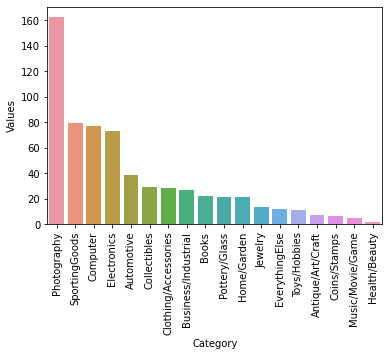

In [16]:
import seaborn as sns
sns.barplot(x = 'Category',y = 'Values',data = bar1)
g = sns.barplot(x = 'Category',y = 'Values',data = bar1) 
g.set_xticklabels(g.get_xticklabels(),rotation=90)

**Analysis**: It is observed that items from the Photography sector are sold the highest and the least with Health/Beauty . One of the reasons for Health/Beauty being the least, is that people may not be reliable on Beauty products that are sold at auction. This helps in conclusion that more items related to the photography sector be encouraged for higher bidding of items.

In [17]:
t=df.groupby('Category').count()
t["Difference"].sort_values(ascending=False)

Category
Music/Movie/Game        403
Collectibles            239
Toys/Hobbies            234
Automotive              178
Antique/Art/Craft       177
SportingGoods           124
Clothing/Accessories    119
Home/Garden             102
Jewelry                  82
Health/Beauty            64
Electronics              55
Books                    54
Coins/Stamps             37
Computer                 36
Pottery/Glass            20
Business/Industrial      18
EverythingElse           17
Photography              13
Name: Difference, dtype: int64

**The other bar plot is  constructed to understand category wise how many items are put for online auctions.**

[Text(0, 0, 'Music/Movie/Game'),
 Text(1, 0, 'Collectibles'),
 Text(2, 0, 'Toys/Hobbies'),
 Text(3, 0, 'Automotive'),
 Text(4, 0, 'Antique/Art/Craft'),
 Text(5, 0, 'SportingGoods'),
 Text(6, 0, 'Clothing/Accessories'),
 Text(7, 0, 'Home/Garden'),
 Text(8, 0, 'Jewelry'),
 Text(9, 0, 'Health/Beauty'),
 Text(10, 0, 'Electronics'),
 Text(11, 0, 'Books'),
 Text(12, 0, 'Coins/Stamps'),
 Text(13, 0, 'Computer'),
 Text(14, 0, 'Pottery/Glass'),
 Text(15, 0, 'Business/Industrial'),
 Text(16, 0, 'EverythingElse'),
 Text(17, 0, 'Photography')]

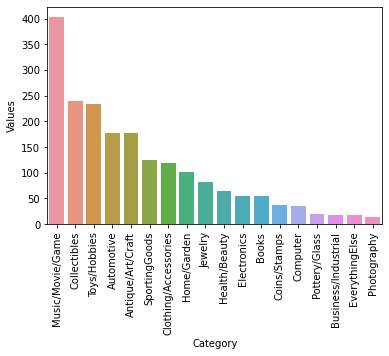

In [18]:
bar2 = pd.read_excel(r"D:\Sem 3\Statistical learning and data mining\Assignment 4\BarChart2.xlsx")
bar2.columns
g1=sns.barplot(x = 'Category',y = 'Values',data = bar2)
g1.set_xticklabels(g1.get_xticklabels(),rotation=90)

**Analysis**: It is observed that most items are kept from the Music/Movie/Game sector and the least from the Photography sector. This gives a completely contradictory results as it was observed that the highest amount of items are sold from photography sector but very few items are kept, hence in online auctions more such items should be kept as it be attract customers and engage them more with online auctions

In [19]:
df = pd.read_csv(r"D:\Sem 3\Statistical learning and data mining\Assignment 4\Change.csv")

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1972 entries, 0 to 1971
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Category      1972 non-null   object 
 1   currency      1972 non-null   object 
 2   sellerRating  1972 non-null   int64  
 3   Duration      1972 non-null   int64  
 4   endDay        1972 non-null   object 
 5   ClosePrice    1972 non-null   float64
 6   OpenPrice     1972 non-null   float64
 7   Competitive?  1972 non-null   int64  
dtypes: float64(2), int64(3), object(3)
memory usage: 123.4+ KB


In [21]:
from sklearn import preprocessing 

var = ['Category','currency','endDay']

label_encoder = preprocessing.LabelEncoder()

for column in var:
    df[column] = label_encoder.fit_transform(df[column])

In [22]:
df.head()

,Category,currency,sellerRating,Duration,endDay,ClosePrice,OpenPrice,Competitive?
0,13,2,3249,5,1,0.01,0.01,0
1,13,2,3249,5,1,0.01,0.01,0
2,13,2,3249,5,1,0.01,0.01,0
3,13,2,3249,5,1,0.01,0.01,0
4,13,2,3249,5,1,0.01,0.01,0


In [23]:
from sklearn.model_selection import train_test_split

X = df.drop('Competitive?', axis=1).values
y = df['Competitive?'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=45)

## Model Development 

### Decision Tree

In [24]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(criterion='gini',splitter='best',min_samples_split=5,max_features='sqrt',random_state=21)

dt.fit(X_train, y_train)

y_pred = dt.predict(X_test)

### Feature Importance using Decision Tree

The attributes are ranked according to information gain in the decision tree model. This is an efficient method to identify important features.

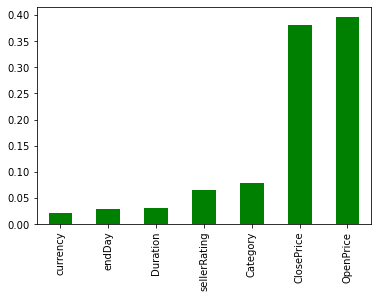

In [25]:
X = df.drop('Competitive?', axis=1)
y = df['Competitive?']

feature_importance = pd.Series(dt.feature_importances_, index = X.columns)

sorted_importance = feature_importance.sort_values()

sorted_importance.plot(kind='bar',color='green'); 

plt.show()

C:\Users\Barnali Das\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


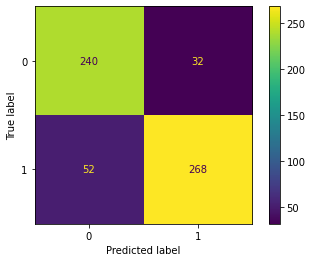

In [26]:
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(dt, X_test, y_test)
plt.show()

**Analysis**: In accordance with confusion Matrix, it can be interpreted that the model was able to predict positive 82.1% of time and negative 89.33% of time.

### Logistic Regression 

In [27]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()

logreg.fit(X_train, y_train)

y_pred = logreg.predict(X_test)

y_pred_probs = logreg.predict_proba(X_test)[:, 1]

Area under the curve is 0.8649586397058824


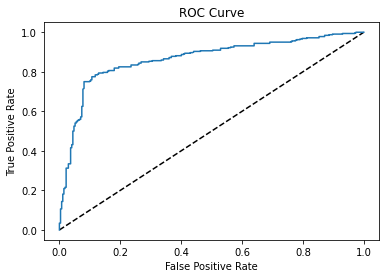

In [28]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn import metrics
fpr, tpr, thresholds = roc_curve(y_test, y_pred_probs)
auc=metrics.roc_auc_score(y_test, y_pred_probs)
print("Area under the curve is",auc)

plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

**Interpretation**: Receiver Operating Characteristic (ROC) Curve: An ROC Curve is a graphical representation of the performance of a classification model at all classification thresholds. 

The two parameters in focus are 
1) True Positive Rate: competitive auctions that the model predicted correctly 
2) False Positive Rate: auctions which are not competitive that the model classified as competitive

Lowering the classification threshold classifies more items as positive, thus increasing both False Positives and True Positives. 

AUC (Area under the curve) provides an aggregate performance measure across all possible classification thresholds. One way of interpreting AUC is the probability that the model ranks a random positive example more highly than a random negative example. AUC ranges in value from 0 to 1. A model whose predictions are 100% wrong has an AUC of 0.0; one whose predictions are 100% correct has an AUC of 1.0.

**Area Under ROC Curve = 0.8649**

C:\Users\Barnali Das\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


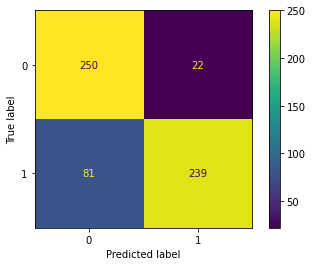

In [29]:
plot_confusion_matrix(logreg, X_test, y_test)
plt.show()

**Analysis**: In this case, model was able to predict positive 75.52% of time and negative 91.5% of time.

### k-nearest neighbours 

In [30]:
from sklearn.neighbors import KNeighborsClassifier 

neighbors = np.arange(1, 13)
train_accuracies = {}
test_accuracies = {}

for neighbor in neighbors:
    
    knn = KNeighborsClassifier(n_neighbors=neighbor)
  
    knn.fit(X_train, y_train)
     
    train_accuracies[neighbor] = knn.score(X_train, y_train)
    test_accuracies[neighbor] = knn.score(X_test, y_test)

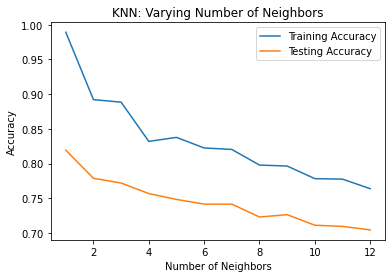

In [31]:
plt.title("KNN: Varying Number of Neighbors")

plt.plot(neighbors, train_accuracies.values(), label="Training Accuracy")

plt.plot(neighbors, test_accuracies.values(), label="Testing Accuracy")

plt.legend()
plt.xlabel("Number of Neighbors")
plt.ylabel("Accuracy")

plt.show()

**Interpretation**: The accuracy score for the training and testing set is computed for a range of values of k and the optimum value is selected. 

In [32]:
knn = KNeighborsClassifier(n_neighbors=3)

knn.fit(X_train, y_train)

print(knn.score(X_test, y_test))

0.7719594594594594


C:\Users\Barnali Das\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


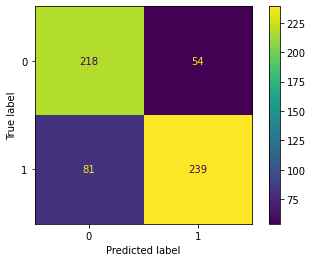

In [33]:
plot_confusion_matrix(knn, X_test, y_test)
plt.show()

**Analysis**: In case of KNN, the model was able to predict positive 72.9% of time and negative was predicted 81.5% of time.

## Model Selection

A graphical representation is created to summarize the performance of the three classification models - logistic regression, decision tree and k-nearest neighbour classifier. The visulization shows the accuracy rate of each classifier using a boxplot in which the distribution of the cross-validation scores. This graph provides insights to understand both bias and variance of the model. 

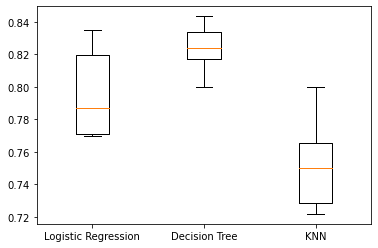

In [34]:
from sklearn.model_selection import cross_val_score, KFold
import warnings 

warnings.filterwarnings('ignore')

models = {"Logistic Regression": LogisticRegression(),
          "Decision Tree": DecisionTreeClassifier(criterion='gini',splitter='best',min_samples_split=5,max_features='sqrt',random_state=21),
          "KNN": KNeighborsClassifier(n_neighbors=4)}

results = []

for model in models.values():
    kf = KFold(n_splits=6, random_state=21, shuffle=True)
    cv_results = cross_val_score(model, X_train, y_train, cv=kf)
    results.append(cv_results)
    
plt.boxplot(results, labels = models.keys())
plt.show()

**Analysis**: It can be observed that the decision tree classifer has the best performance in terms of accuracy. The median accuracy for the decision tree classifier is 83% approximately. The variance in accuracy scores is also low for the decision tree classifier. The logistic regression model has a median accuracy of 79% and knn classifier has a median accuracy of 75%. 
Both logistic regression and knn classifier have a high variability in their accuracy scores. Hence, we can reccomend the decision tree model for assesing the competitivenes of eBay auctions. 

## Conclusions and Recomendations

The study shows that the **four** most important factors which determine the competitiveness of the auction, in the order of their importance are:

 - Opening Price 
 - Closing Price 
 - Category
 - Seller rating

These are the attributes which influence the competitiveness of the auction most and can be conisdered as important factors in model development. After developing three predictive models for binary classification (competitve/not competitive) and evaluating their performance, it is observed that the decision tree classifier is the best performing model. 

**Recommendations**: 
- For ensuring that the auctions are fair and competitive, the company should create a standard opening price for items of similar category as it is a very infuential factor. 

- Category is an important factor, even more influential than seller rating, based on difference in opening price and closing price which shows that auctions are more competitive. Thus, it is more profitable for the company when sellers auction items from specific categories such as photography. The company should promote and focus on itens from certain categories. 